In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
x_train = pd.read_csv('./data/track1/features/x_train.csv')
x_valid = pd.read_csv('./data/track1/features/x_valid.csv')
x_test = pd.read_csv('./data/track1/features/x_test.csv')
y_train = pd.read_csv('./data/track1/features/y_train.csv')
y_valid = pd.read_csv('./data/track1/features/y_valid.csv')
y_test = pd.read_csv('./data/track1/features/y_test.csv')

In [23]:
x_train_features = x_train.drop(columns=['날짜', 'CODE'], inplace=False)
y = y_train['Y'] <-5.0

In [24]:
y.value_counts()

False    74417
True      2079
Name: Y, dtype: int64

In [15]:
x_train_features.head()

,BPS,PER,PBR,EPS,DIV,DPS,거래량,시가총액,금리,유동자산,...,유동부채,비유동부채,부채총계,이익잉여금,자본총계,매출액,영업이익,법인세차감전 순이익,당기순이익,자본금
0,-0.495113,1.256968,-0.766571,-0.548917,0.616262,-0.433568,-0.693488,-0.725389,1.067388,-0.759644,...,-0.851580,-0.707609,-0.811188,-0.108761,-0.571487,-0.760714,-0.536730,-0.498647,-0.495902,-0.732200
1,-0.633751,0.137159,-0.169323,-0.374962,1.216071,-0.254778,8.542551,-0.532260,-0.906554,-0.530447,...,-0.519256,-0.476089,-0.540351,-0.036868,-0.543980,1.937225,0.388199,-0.042843,-0.069680,-0.503973
2,7.747009,-0.794005,-1.168565,18.660106,3.426993,7.314013,0.162462,2.636423,1.856964,13.707215,...,13.152690,6.916716,9.866762,2.034260,10.296689,5.435611,7.902064,7.849587,6.368202,5.548438
3,0.426044,-0.547647,-0.215265,4.198169,0.581389,1.205344,-0.790637,0.522686,1.856964,0.379260,...,-0.193619,-0.538328,-0.374662,0.508705,0.792714,0.023084,0.977278,1.357815,1.156906,-0.970299
4,-0.816213,-0.932689,1.071116,-0.678304,-0.911158,-0.731552,3.244534,-0.729458,-0.906554,-0.691097,...,-0.490316,-0.568161,-0.555470,-0.865778,-0.929122,-0.697889,-1.150816,-1.088154,-1.173132,-0.134626


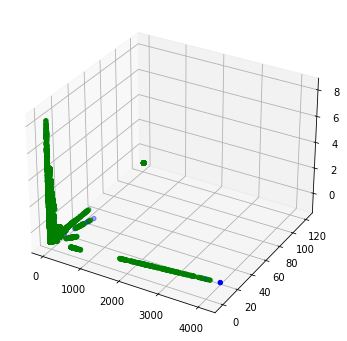

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
x_train0 = x_train[y==False]
x_train1 = x_train[y==True]

ax.scatter(x_train0['PER'], x_train0['PBR'], x_train0['DIV'], c="Green")
ax.scatter(x_train1['PER'], x_train1['PBR'], x_train1['DIV'], c="Blue")

#ax.scatter(x_test['PBR'], x_test['거래량'], x_test['시가총액'])

plt.show()

### 1. Feature Filtering 
calculate mutual information of features with risk

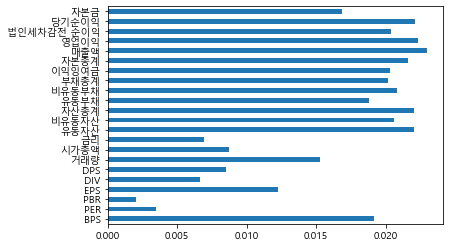

In [4]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(x_train_features, y, discrete_features=False)
mutual_info_series = pd.Series(mutual_info, x_train_features.columns)

plt.rc('font', family='Malgun Gothic')
mutual_info_series.plot(kind='barh')
plt.show()

### 2. Backward Feture Selection

In [6]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

rfecv = RFECV(estimator=RandomForestClassifier(), step = 1)
results = rfecv.fit_transform(x_train_features, y)


In [ ]:
print("size of optimal feature set : %d" %rfecv.n_features_ )

average_grid_score = rfecv.grid_scores_.mean(axis= 1)

plt.figure()
plt.xlabel("number of selected feature")
plt.ylabel("accuracy")
plt.plot(average_grid_score)
plt.show()

In [10]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


rfe = RFE(estimator = RandomForestClassifier(), n_features_to_select = 3)
rfe_result = rfe.fit_transform(x_train_features, y)
ref_result = pd.DataFrame(rfe_result, index=x_train_features.index)

for i in range(x_train_features.shape[1]) :
    print('Feature: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

ref_features =[]
for i in ref_result.columns :
    for j in x_train_features.columns :
        if np.all(X[j] == rfe_result[i]):
            ref_features.append(j)
print(ref_features)

Feature: 0, Selected False, Rank: 8.000
Feature: 1, Selected False, Rank: 2.000
Feature: 2, Selected True, Rank: 1.000
Feature: 3, Selected False, Rank: 19.000
Feature: 4, Selected False, Rank: 5.000
Feature: 5, Selected False, Rank: 20.000
Feature: 6, Selected True, Rank: 1.000
Feature: 7, Selected True, Rank: 1.000
Feature: 8, Selected False, Rank: 10.000
Feature: 9, Selected False, Rank: 15.000
Feature: 10, Selected False, Rank: 4.000
Feature: 11, Selected False, Rank: 14.000
Feature: 12, Selected False, Rank: 7.000
Feature: 13, Selected False, Rank: 12.000
Feature: 14, Selected False, Rank: 16.000
Feature: 15, Selected False, Rank: 11.000
Feature: 16, Selected False, Rank: 3.000
Feature: 17, Selected False, Rank: 6.000
Feature: 18, Selected False, Rank: 13.000
Feature: 19, Selected False, Rank: 17.000
Feature: 20, Selected False, Rank: 9.000
Feature: 21, Selected False, Rank: 18.000


NameError: name 'X' is not defined